In [1]:
from pathlib import Path

from trade_analysis.ingress import load_trade_csv_v1
from trade_analysis.processing import compute_shares
from trade_analysis.charts.pie import plot_pie
from trade_analysis.charts.line import plot_share_over_time

In [2]:
df = load_trade_csv_v1(Path("data/hs30.csv"))
result = compute_shares(df)
print(result)

shape: (9_226, 12)
┌────────────┬────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ time_perio ┆ value  ┆ partner_co ┆ partner_n ┆ … ┆ yoy_chang ┆ ma_3y     ┆ is_signif ┆ was_signi │
│ d          ┆ ---    ┆ de         ┆ ame       ┆   ┆ e_percent ┆ ---       ┆ icant     ┆ ficant    │
│ ---        ┆ i64    ┆ ---        ┆ ---       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ ---       │
│ i64        ┆        ┆ str        ┆ str       ┆   ┆ f64       ┆           ┆ bool      ┆ bool      │
╞════════════╪════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2014       ┆ 168897 ┆ AD         ┆ Andorra   ┆ … ┆ null      ┆ null      ┆ false     ┆ null      │
│ 2015       ┆ 230220 ┆ AD         ┆ Andorra   ┆ … ┆ 36.307927 ┆ 217226.0  ┆ false     ┆ false     │
│ 2016       ┆ 252561 ┆ AD         ┆ Andorra   ┆ … ┆ 9.704196  ┆ 167059.66 ┆ false     ┆ false     │
│            ┆        ┆            ┆           ┆   ┆           ┆ 6667   

In [3]:
product_codes = result["product_code"].unique().sort()
analysis_years = result["time_period"].unique().sort()

print("Product codes:", product_codes.to_list())
print("Years:", analysis_years.to_list())

Product codes: ['30', '3001', '3002', '3003', '3004', '3005', '3006']
Years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


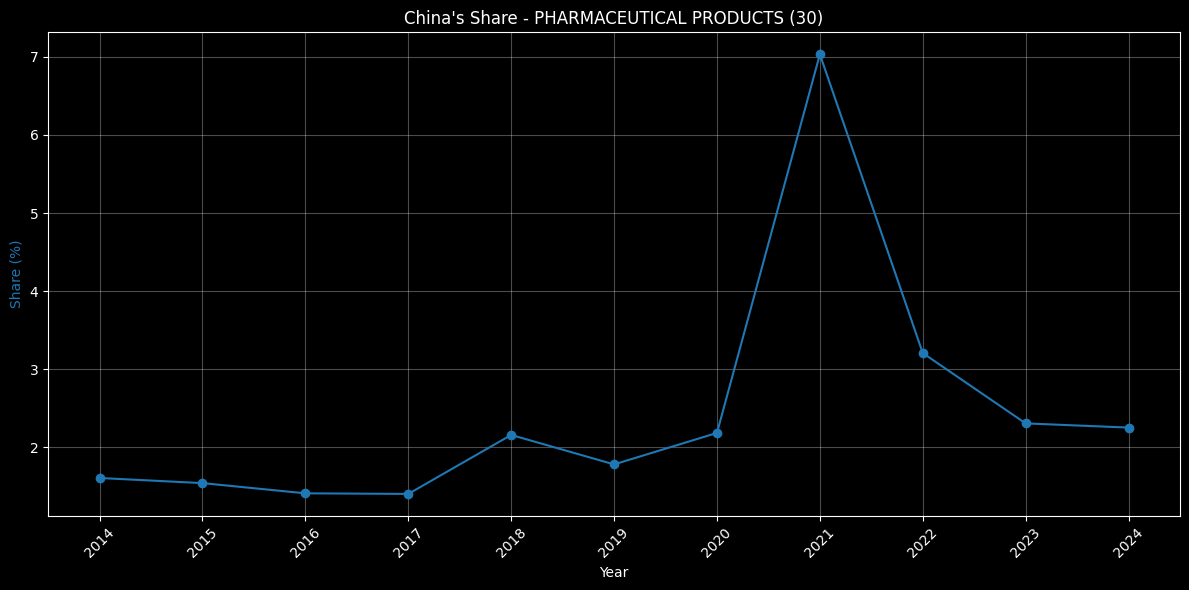

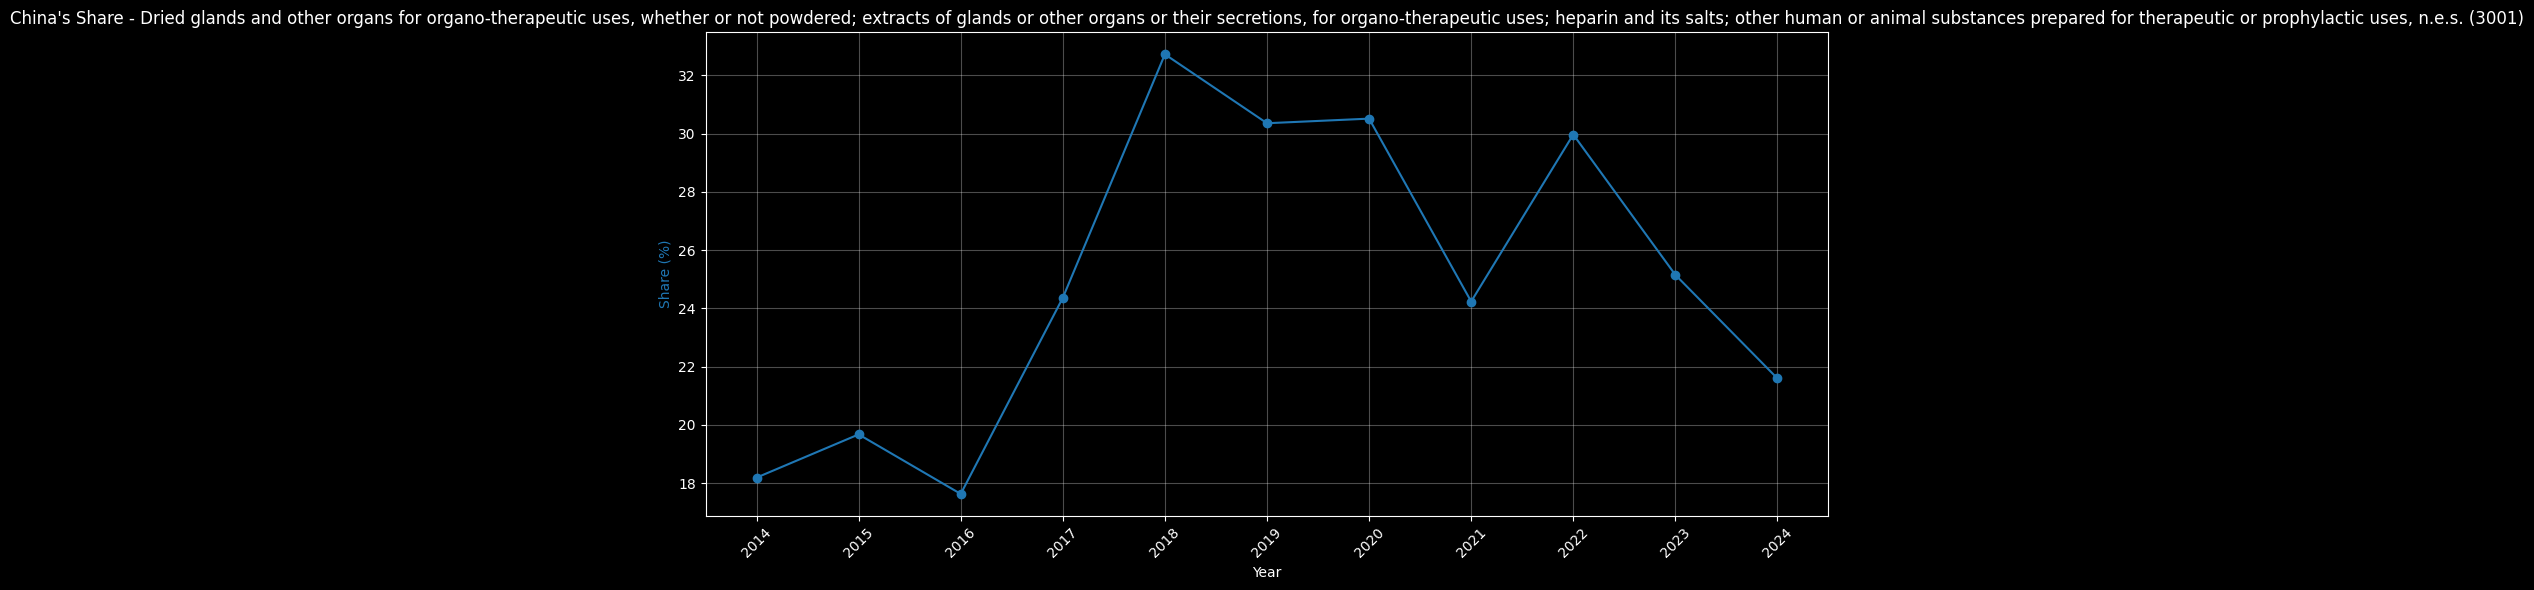

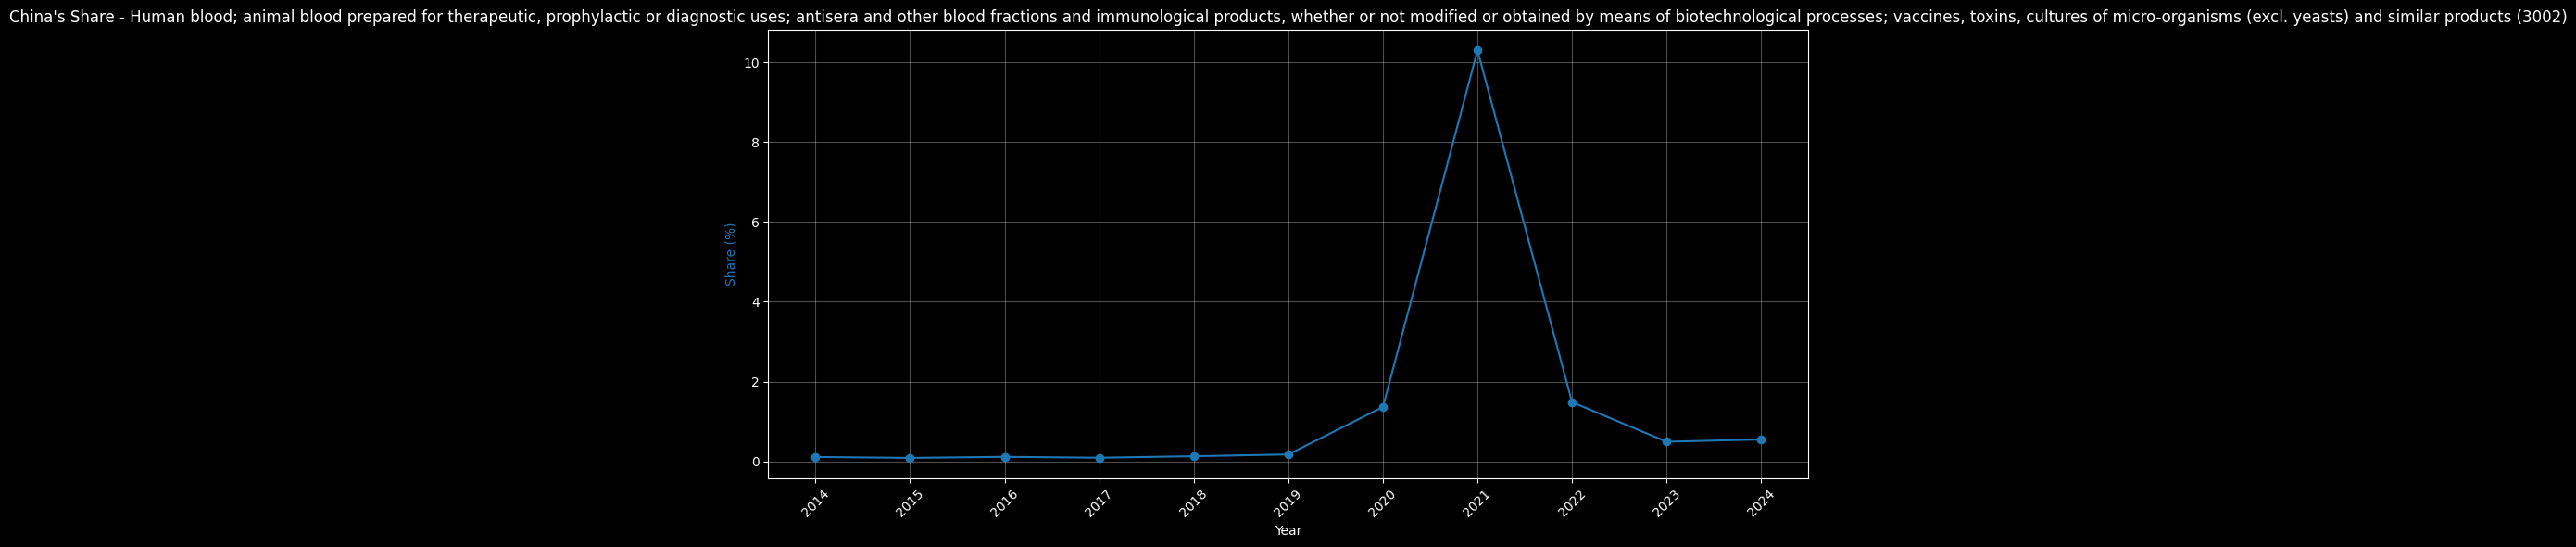

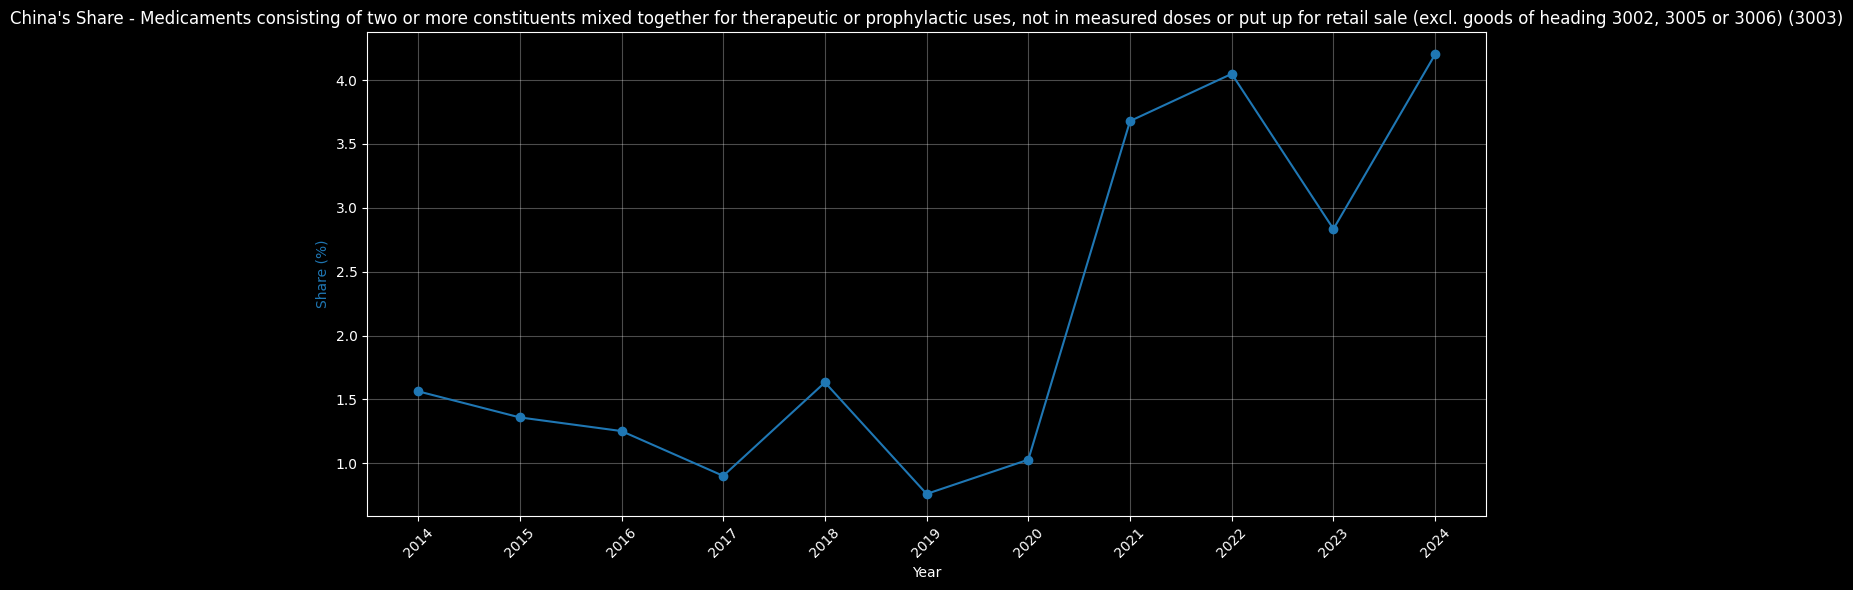

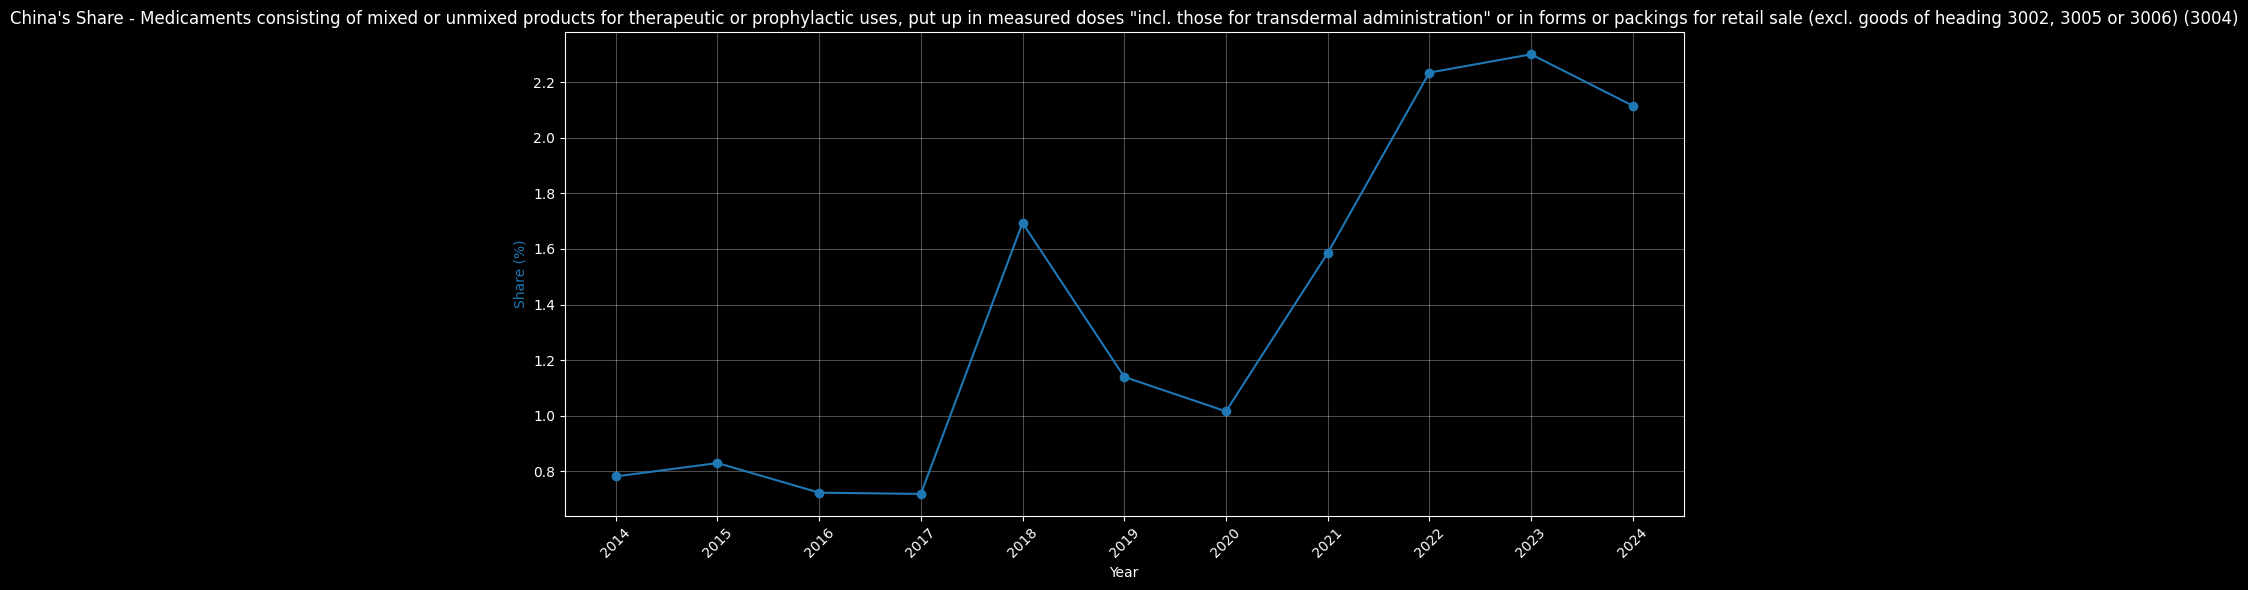

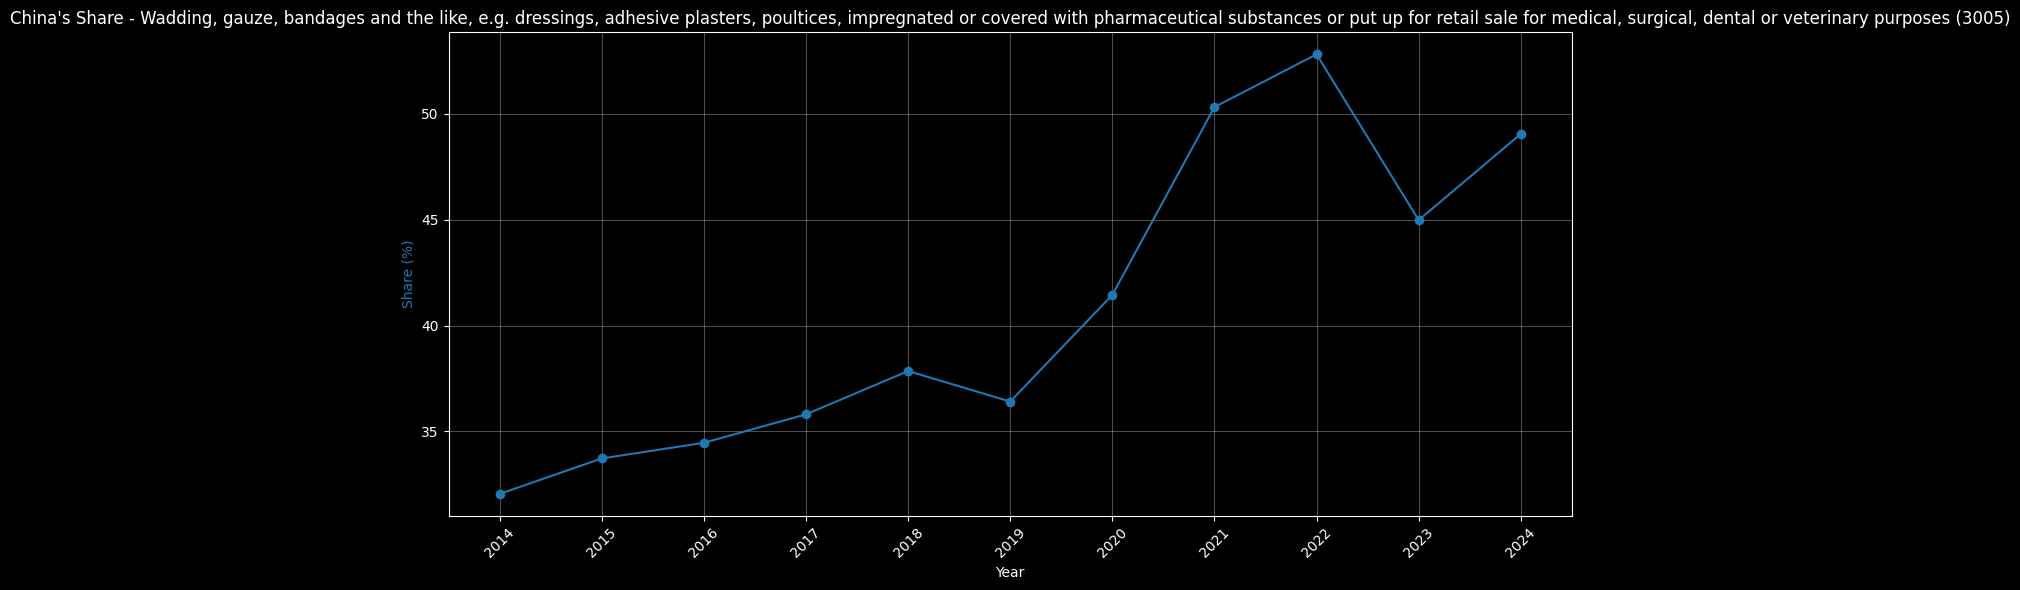

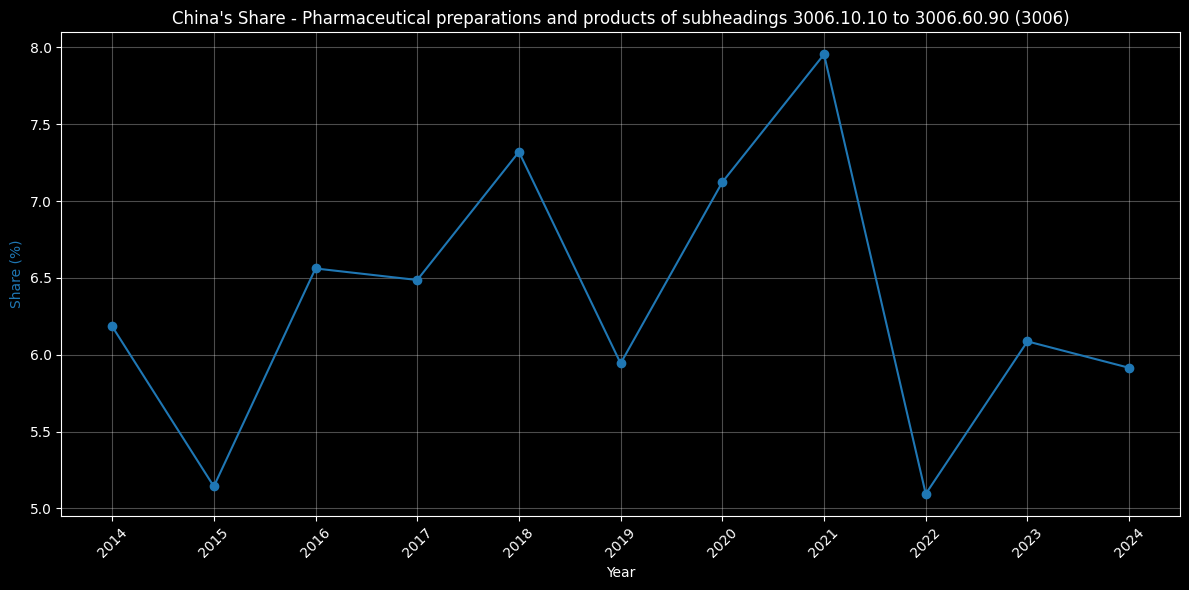

In [4]:
# Line chart: China's share over time for each product
for code in product_codes:
    plot_share_over_time(result, code, partner_code="CN")

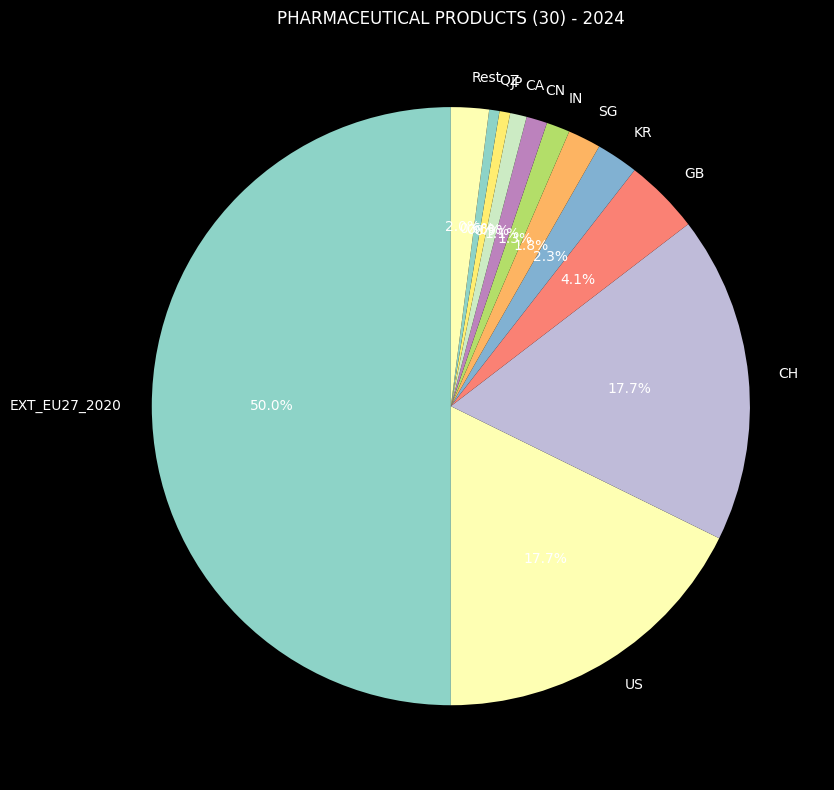

In [5]:
# Pie charts: partner breakdown for a specific product and year
plot_pie(result, product_codes[0], analysis_years[-1])